# 🍔 Food-101 Dataset Exploration

## Objective
This notebook explores the Food-101 dataset to understand:
- Dataset structure and organization
- Number of classes and images
- Train/test splits
- Image properties (dimensions, file sizes)
- Class distribution and balance
- Sample visualizations

**Dataset**: Food-101 contains 101,000 images across 101 food categories
- Training: 750 images per class (75,750 total)
- Testing: 250 images per class (25,250 total)

## 1. Import Required Libraries

In [7]:
import os
import json
import random
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Verify Downloaded Files & Dataset Structure

In [8]:
# Define paths
DATA_DIR = Path(r"D:\Python ML Projects\Food_Recognition_ML\data\raw\food-101")
IMAGES_DIR = DATA_DIR / "images"
META_DIR = DATA_DIR / "meta"

# Check if dataset exists
print("📁 Dataset Directory Structure:")
print(f"Dataset root: {DATA_DIR}")
print(f"Exists: {DATA_DIR.exists()}\n")

# List main directories
if DATA_DIR.exists():
    print("Contents:")
    for item in sorted(DATA_DIR.iterdir()):
        if item.is_dir():
            print(f"  📂 {item.name}/")
        else:
            print(f"  📄 {item.name}")
    
    # Check metadata files
    print(f"\n📊 Metadata Files in 'meta' directory:")
    if META_DIR.exists():
        for item in sorted(META_DIR.iterdir()):
            print(f"  📄 {item.name}")
    
    # Count food categories
    if IMAGES_DIR.exists():
        categories = sorted([d.name for d in IMAGES_DIR.iterdir() if d.is_dir()])
        print(f"\n🍕 Number of food categories: {len(categories)}")
        print(f"First 10 categories: {categories[:10]}")
else:
    print("❌ Dataset not found! Please run download_food101.py first.")

📁 Dataset Directory Structure:
Dataset root: D:\Python ML Projects\Food_Recognition_ML\data\raw\food-101
Exists: True

Contents:
  📂 images/
  📄 license_agreement.txt
  📂 meta/
  📄 README.txt

📊 Metadata Files in 'meta' directory:
  📄 classes.txt
  📄 labels.txt
  📄 test.json
  📄 test.txt
  📄 train.json
  📄 train.txt

🍕 Number of food categories: 101
First 10 categories: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


## 3. Load Metadata (Train/Test Splits)

In [9]:
# Load train and test splits
with open(META_DIR / "train.json", "r") as f:
    train_data = json.load(f)

with open(META_DIR / "test.json", "r") as f:
    test_data = json.load(f)

# Load class names
with open(META_DIR / "classes.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]

print("📊 Dataset Statistics:")
print(f"Total classes: {len(classes)}")
print(f"Training images: {sum(len(imgs) for imgs in train_data.values())}")
print(f"Testing images: {sum(len(imgs) for imgs in test_data.values())}")
print(f"Total images: {sum(len(imgs) for imgs in train_data.values()) + sum(len(imgs) for imgs in test_data.values())}")

print(f"\n📋 Sample classes:")
for i, cls in enumerate(classes[:10], 1):
    train_count = len(train_data.get(cls, []))
    test_count = len(test_data.get(cls, []))
    print(f"{i:2d}. {cls:30s} - Train: {train_count:3d}, Test: {test_count:3d}")

📊 Dataset Statistics:
Total classes: 101
Training images: 75750
Testing images: 25250
Total images: 101000

📋 Sample classes:
 1. apple_pie                      - Train: 750, Test: 250
 2. baby_back_ribs                 - Train: 750, Test: 250
 3. baklava                        - Train: 750, Test: 250
 4. beef_carpaccio                 - Train: 750, Test: 250
 5. beef_tartare                   - Train: 750, Test: 250
 6. beet_salad                     - Train: 750, Test: 250
 7. beignets                       - Train: 750, Test: 250
 8. bibimbap                       - Train: 750, Test: 250
 9. bread_pudding                  - Train: 750, Test: 250
10. breakfast_burrito              - Train: 750, Test: 250


## 4. Inspect Class Distribution

In [10]:
# Create DataFrame for analysis
train_counts = {cls: len(imgs) for cls, imgs in train_data.items()}
test_counts = {cls: len(imgs) for cls, imgs in test_data.items()}

df = pd.DataFrame({
    'class': classes,
    'train_count': [train_counts[cls] for cls in classes],
    'test_count': [test_counts[cls] for cls in classes],
    'total_count': [train_counts[cls] + test_counts[cls] for cls in classes]
})

print("📈 Class Distribution Statistics:")
print(df[['train_count', 'test_count', 'total_count']].describe())

# Check for class balance
print("\n⚖️ Class Balance:")
print(f"All classes have exactly {df['train_count'].unique()[0]} training images")
print(f"All classes have exactly {df['test_count'].unique()[0]} testing images")
print(f"✅ Dataset is perfectly balanced!")

📈 Class Distribution Statistics:
       train_count  test_count  total_count
count        101.0       101.0        101.0
mean         750.0       250.0       1000.0
std            0.0         0.0          0.0
min          750.0       250.0       1000.0
25%          750.0       250.0       1000.0
50%          750.0       250.0       1000.0
75%          750.0       250.0       1000.0
max          750.0       250.0       1000.0

⚖️ Class Balance:
All classes have exactly 750 training images
All classes have exactly 250 testing images
✅ Dataset is perfectly balanced!


## 5. Visualize Sample Images

d:\Python ML Projects\Food_Recognition_ML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127828 (\N{HAMBURGER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


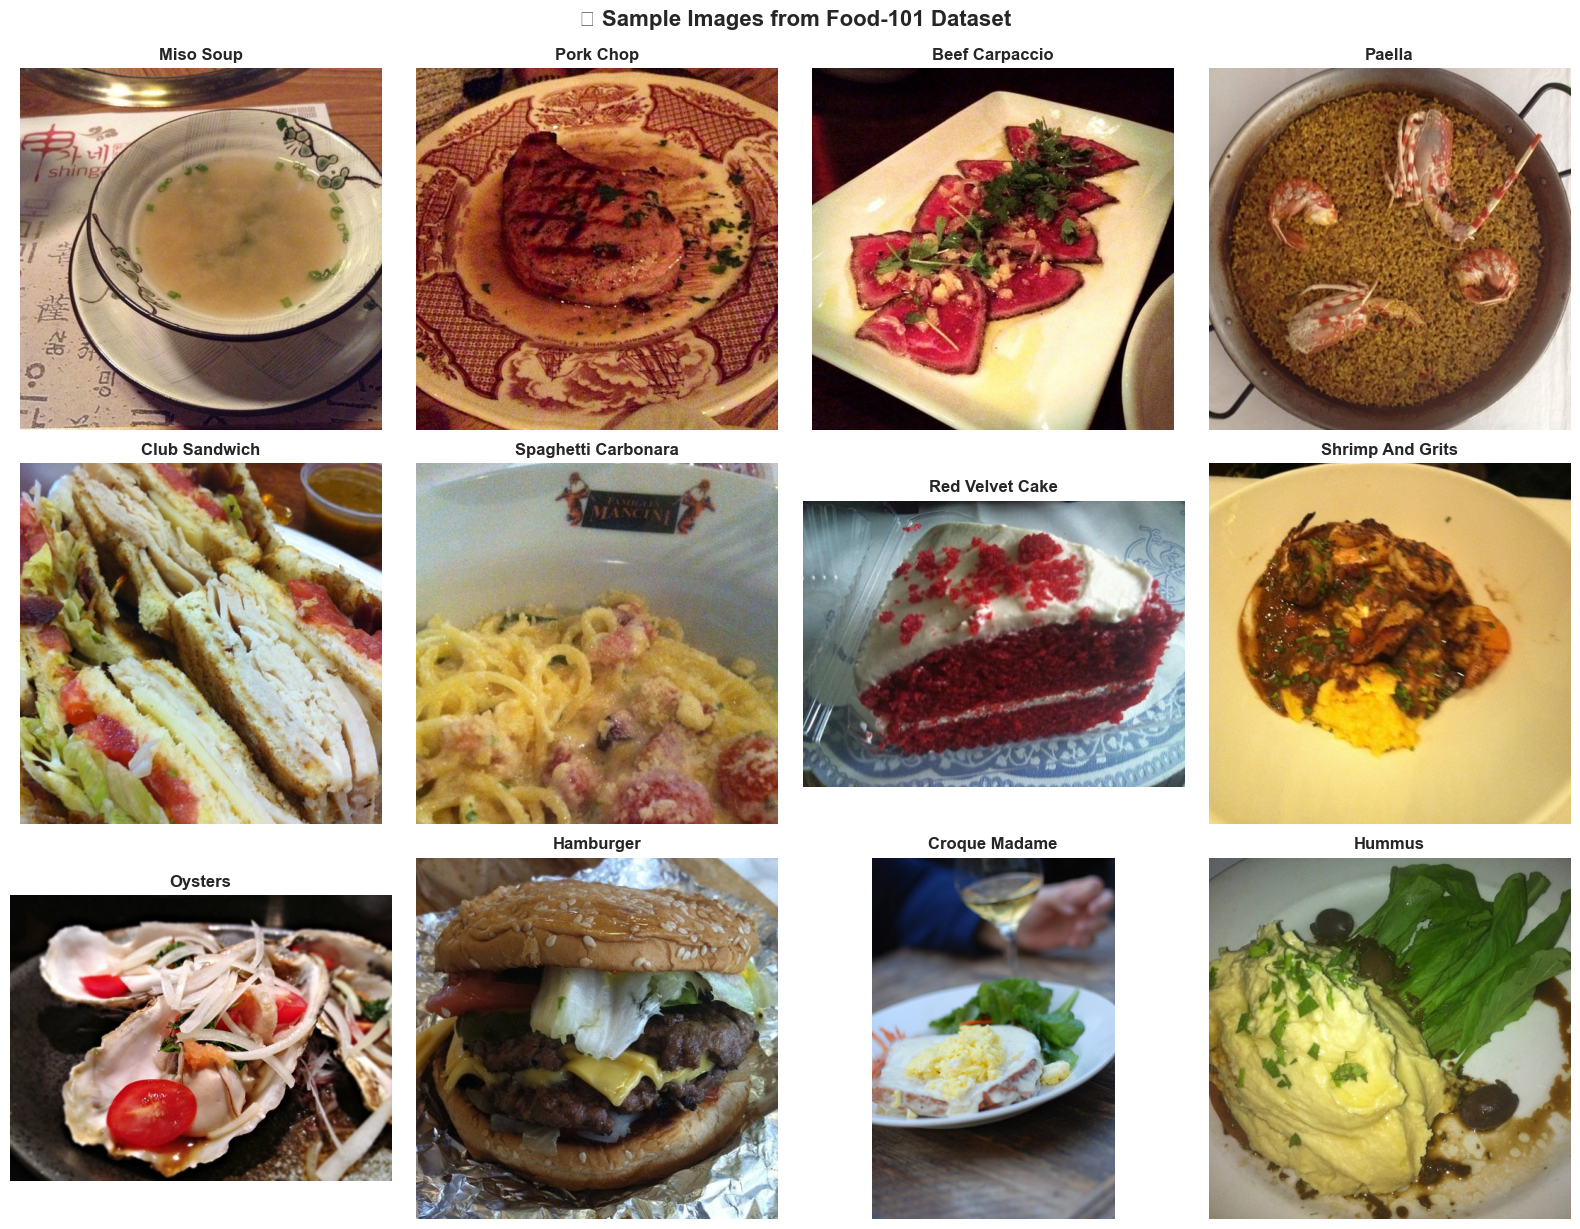

✅ Displayed 12 random food samples


In [6]:
# Display sample images from random classes
num_samples = 12
selected_classes = random.sample(classes, num_samples)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, cls in enumerate(selected_classes):
    # Get a random training image
    img_name = random.choice(train_data[cls])
    img_path = IMAGES_DIR / f"{img_name}.jpg"
    
    # Load and display image
    img = Image.open(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(cls.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('🍔 Sample Images from Food-101 Dataset', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print(f"✅ Displayed {num_samples} random food samples")

## 6. Analyze Image Properties

📐 Analyzing image properties from 500 random samples...

📊 Image Dimensions Statistics (from 500 samples):
Width:  min= 289, max= 512, mean= 500.6, median= 512.0
Height: min= 287, max= 512, mean= 471.4, median= 512.0
Aspect Ratio: min=0.56, max=1.78, mean=1.09
File Size (KB): min=19.3, max=125.7, mean=50.3


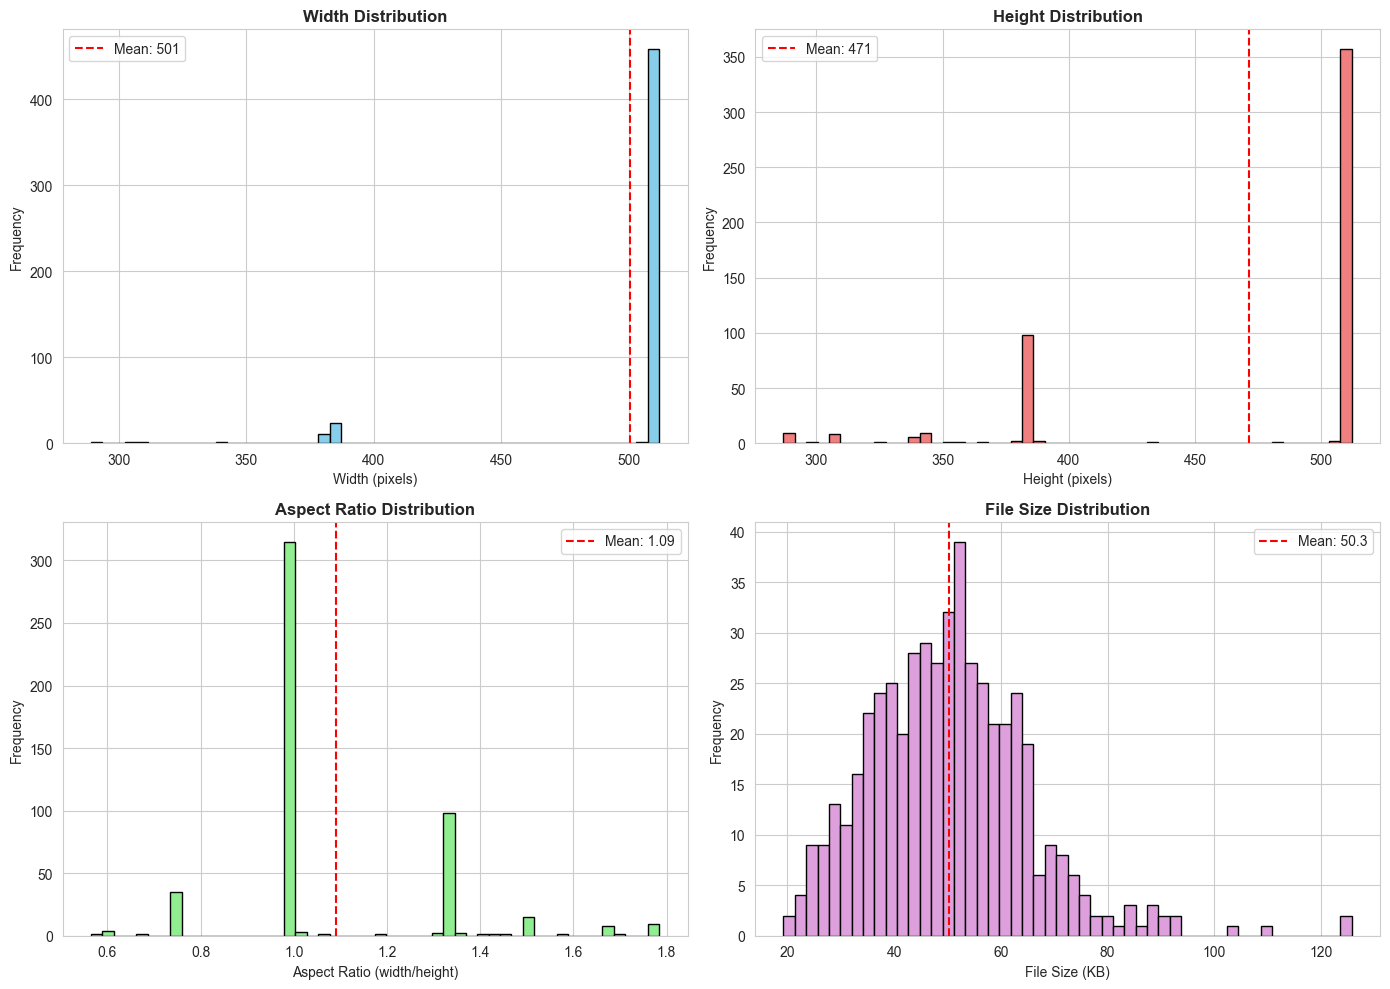


💡 Insights:
- Images have varying dimensions (not uniform)
- Most images are roughly square (aspect ratio ~1.0)
- Will need to resize images to fixed size for training (e.g., 224x224)


In [11]:
# Sample random images to analyze properties
sample_size = 500  # Sample 500 images for analysis
print(f"📐 Analyzing image properties from {sample_size} random samples...")

widths = []
heights = []
aspect_ratios = []
file_sizes = []

# Sample images
sampled_images = []
for cls in random.sample(classes, min(50, len(classes))):  # Sample from 50 classes
    for img_name in random.sample(train_data[cls], min(10, len(train_data[cls]))):
        sampled_images.append((cls, img_name))

# Analyze sampled images
for cls, img_name in sampled_images[:sample_size]:
    img_path = IMAGES_DIR / f"{img_name}.jpg"  # ✅ Results in: images/ramen/443484.jpg
    
    if img_path.exists():
        # Get image dimensions
        img = Image.open(img_path)
        w, h = img.size
        widths.append(w)
        heights.append(h)
        aspect_ratios.append(w / h)
        
        # Get file size (in KB)
        file_sizes.append(img_path.stat().st_size / 1024)

# Display statistics
print(f"\n📊 Image Dimensions Statistics (from {len(widths)} samples):")
print(f"Width:  min={min(widths):4d}, max={max(widths):4d}, mean={np.mean(widths):6.1f}, median={np.median(widths):6.1f}")
print(f"Height: min={min(heights):4d}, max={max(heights):4d}, mean={np.mean(heights):6.1f}, median={np.median(heights):6.1f}")
print(f"Aspect Ratio: min={min(aspect_ratios):.2f}, max={max(aspect_ratios):.2f}, mean={np.mean(aspect_ratios):.2f}")
print(f"File Size (KB): min={min(file_sizes):.1f}, max={max(file_sizes):.1f}, mean={np.mean(file_sizes):.1f}")

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Width distribution
axes[0, 0].hist(widths, bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Width Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(np.mean(widths), color='red', linestyle='--', label=f'Mean: {np.mean(widths):.0f}')
axes[0, 0].legend()

# Height distribution
axes[0, 1].hist(heights, bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Height Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Height (pixels)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(np.mean(heights), color='red', linestyle='--', label=f'Mean: {np.mean(heights):.0f}')
axes[0, 1].legend()

# Aspect ratio distribution
axes[1, 0].hist(aspect_ratios, bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Aspect Ratio Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Aspect Ratio (width/height)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(np.mean(aspect_ratios), color='red', linestyle='--', label=f'Mean: {np.mean(aspect_ratios):.2f}')
axes[1, 0].legend()

# File size distribution
axes[1, 1].hist(file_sizes, bins=50, color='plum', edgecolor='black')
axes[1, 1].set_title('File Size Distribution', fontweight='bold')
axes[1, 1].set_xlabel('File Size (KB)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(np.mean(file_sizes), color='red', linestyle='--', label=f'Mean: {np.mean(file_sizes):.1f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n💡 Insights:")
print("- Images have varying dimensions (not uniform)")
print("- Most images are roughly square (aspect ratio ~1.0)")
print("- Will need to resize images to fixed size for training (e.g., 224x224)")

## 7. Display Food Categories by Type

In [12]:
# Group food categories by type
print("🍽️ All 101 Food Categories:\n")

# Display in a nice format (4 columns)
cols = 4
for i in range(0, len(classes), cols):
    row_classes = classes[i:i+cols]
    formatted = [f"{i+j+1:3d}. {cls.replace('_', ' ').title():30s}" for j, cls in enumerate(row_classes)]
    print(" | ".join(formatted))

print(f"\n📊 Total: {len(classes)} food categories")
print(f"📸 Total images: {len(classes) * 1000:,}")

🍽️ All 101 Food Categories:

  1. Apple Pie                      |   2. Baby Back Ribs                 |   3. Baklava                        |   4. Beef Carpaccio                
  5. Beef Tartare                   |   6. Beet Salad                     |   7. Beignets                       |   8. Bibimbap                      
  9. Bread Pudding                  |  10. Breakfast Burrito              |  11. Bruschetta                     |  12. Caesar Salad                  
 13. Cannoli                        |  14. Caprese Salad                  |  15. Carrot Cake                    |  16. Ceviche                       
 17. Cheesecake                     |  18. Cheese Plate                   |  19. Chicken Curry                  |  20. Chicken Quesadilla            
 21. Chicken Wings                  |  22. Chocolate Cake                 |  23. Chocolate Mousse               |  24. Churros                       
 25. Clam Chowder                   |  26. Club Sandwich               

## 8. Summary & Next Steps

### ✅ Key Findings:
1. **Dataset is complete**: 101 food categories with 101,000 images
2. **Perfectly balanced**: 750 train + 250 test images per class
3. **Image properties**: Variable dimensions, will need resizing to 224x224
4. **Good variety**: Diverse food types (desserts, main courses, appetizers, etc.)

### 🎯 Next Steps:
1. **Build baseline model** (Notebook 02)
   - Simple CNN or pre-trained model
   - Establish baseline accuracy (~60-70%)

2. **Implement data augmentation** (Notebook 03)
   - Random flips, rotations, color jittering
   - Improve model generalization

3. **Train food recognizer** (Notebook 04)
   - EfficientNet or MobileNet
   - Target: 82%+ top-1 accuracy

4. **Start collecting custom data** for classifier
   - Processed (packaged) foods
   - Unprocessed (raw/fresh) foods

### 📚 Learning Resources:
- [Fast.ai Course](https://course.fast.ai/) - Lesson 1-4
- [Food-101 Paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) - Original dataset paper
- [Transfer Learning Tutorial](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)